Packages requis pour les algorithms de graph causal :
Python : 
•	Cdt
•	Networkx
•	Pytorch
* si besoin : pip install decorator==5.0.9
R :
•	MASS
•	Momentchi2
•	RBGL :
•	if (!require("BiocManager", quietly = TRUE))
•	    install.packages("BiocManager")
•	
•	BiocManager::install("RBGL")
•	GRAPH :
•	if (!require("BiocManager", quietly = TRUE))
•	    install.packages("BiocManager")
•	
•	BiocManager::install("graph")
•	Pcalg
•	Kpcalg
•	Devtools
•	Puis faire dans R : 
library(devtools) 
install_github("Diviyan-Kalainathan/RCIT")


In [1]:
import pandas as pd
import cdt
import networkx as nx
import matplotlib.pyplot as plt

Detecting 1 CUDA device(s).


In [10]:
df = pd.read_csv("dataset_pca.csv")

In [8]:
df

,Politique et Géopolitique,Social,Transport Public,Entreprise,Situation Economique,Environnement,Justice,Energie,International,Recherche Scientifique,Numérique,Indicateur
0,-0.095773,0.056587,-0.201571,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,-1
1,0.000000,-0.113300,-0.185300,-0.126390,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1
2,-0.075880,0.000000,0.000000,0.000000,0.136302,0.000000,0.0,0.000000,0.000000,0.0,0.0,1
3,-0.026495,0.061273,0.476014,0.000000,0.000000,0.094575,0.0,0.000000,0.000000,0.0,0.0,-1
4,0.178850,0.000000,0.000000,0.000000,-0.231550,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
119,-0.001380,0.000000,0.000000,-0.029124,0.000000,-0.057921,0.0,0.420804,-0.086112,0.0,0.0,0
120,0.000000,0.000000,0.000000,0.000000,0.000000,0.084750,0.0,0.000000,0.000000,0.0,0.0,0
121,-0.050067,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,-1


Detecting 1 CUDA device(s).


In [4]:
cdt.SETTINGS.rpath = 'C:/Program Files/R/R-4.2.2/bin/Rscript' #à changer en fonction de l'emplacement de R 

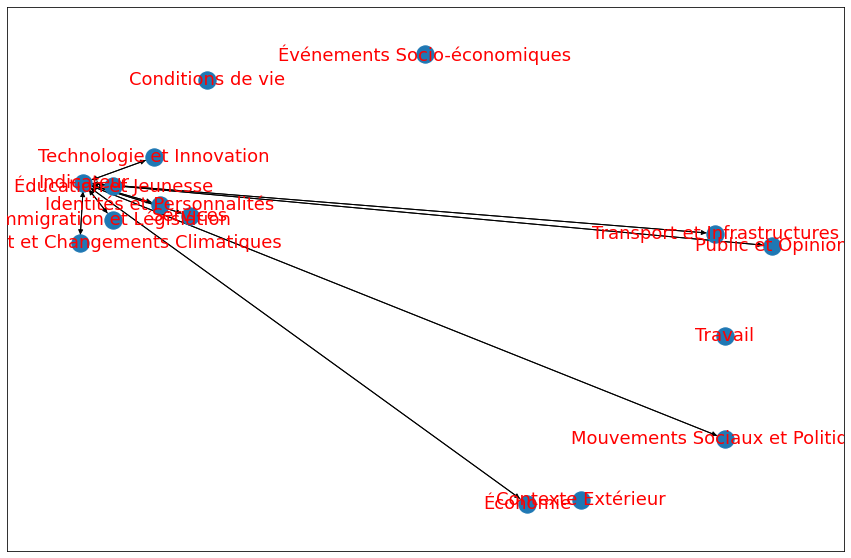

In [11]:
# intialize graph lasso
glasso = cdt.independence.graph.Glasso()

# apply graph lasso to dataset
skeleton = glasso.predict(df)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

## GIES

GIES is ran on the skeleton of the given graph.


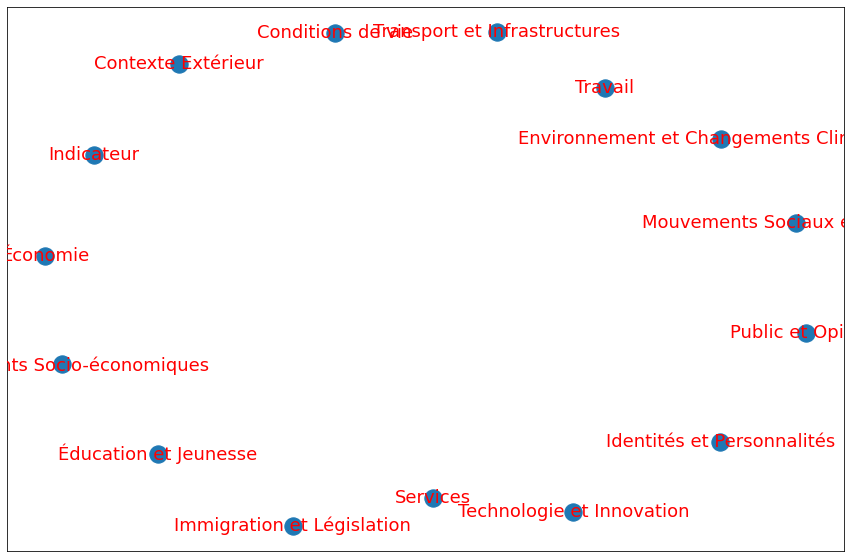

In [12]:
model_gies = cdt.causality.graph.GIES()
graph_gies = model_gies.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_gies, font_size=18, font_color='r')

# get adjaceny matrix of GIES graph
A_gies = nx.adjacency_matrix(graph_gies).todense()

In [13]:
print(nx.adjacency_matrix(graph_gies))

## GES

GES is ran on the skeleton of the given graph.


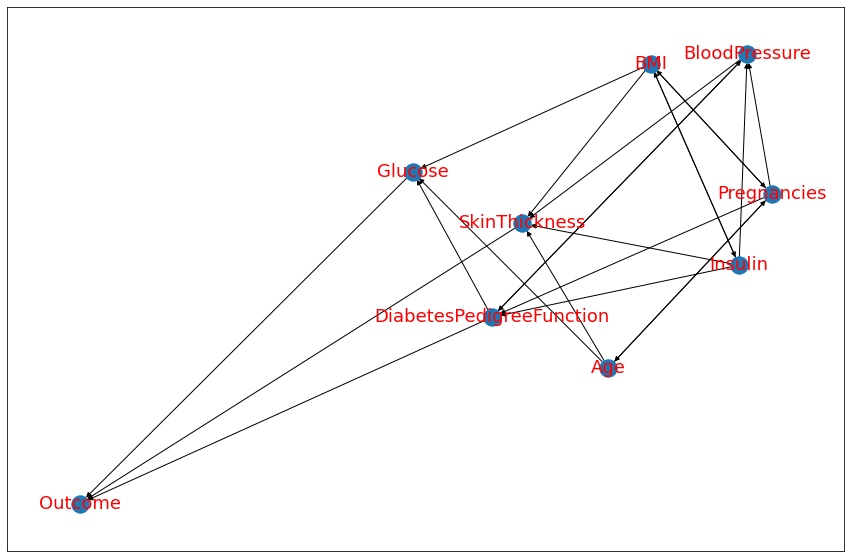

In [12]:
# initialize causal discovery model
model_ges = cdt.causality.graph.GES()
# apply causal discovery model to data and skeleton
graph_ges = model_ges.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_ges, font_size=18, font_color='r')

# get adjaceny matrix of GES graph
A_ges = nx.adjacency_matrix(graph_ges).todense()

## Lingam

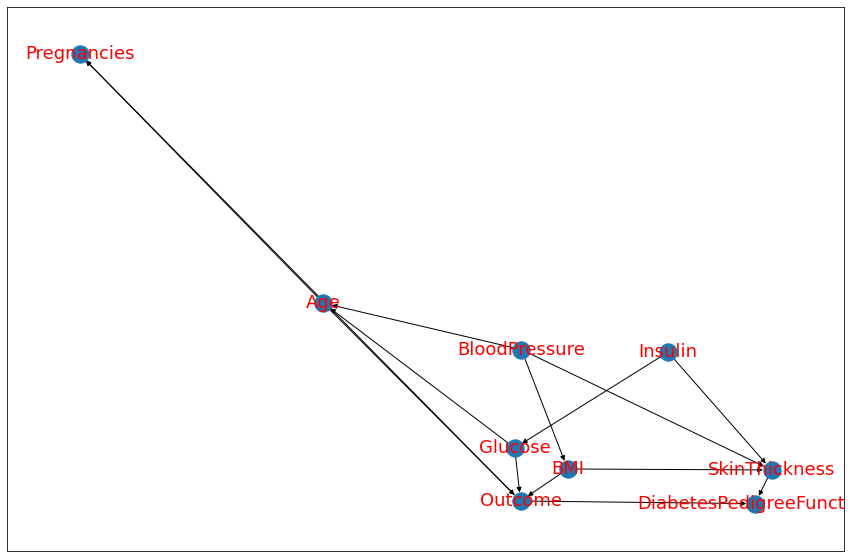

In [13]:
model_lingam = cdt.causality.graph.LiNGAM()
graph_lingam = model_lingam.predict(df)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_lingam, font_size=18, font_color='r')

# get adjaceny matrix of LiNGAM graph
A_lingam = nx.adjacency_matrix(graph_lingam).todense()

## PC

PC is ran on the skeleton of the given graph.


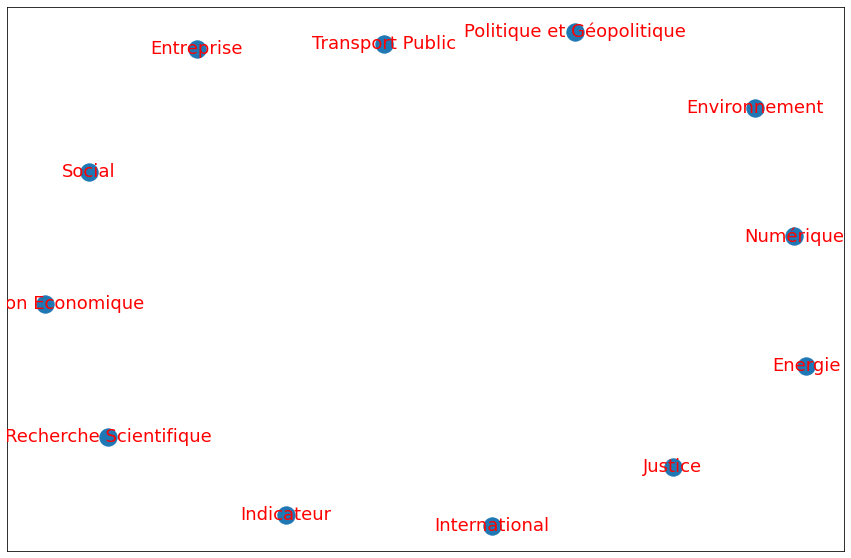

In [9]:
model_pc = cdt.causality.graph.PC()
# graph_pc = model_pc.predict(df)
graph_pc = model_pc.predict(df, skeleton)

# visualize network
fig=plt.figure(figsize=(15,10))
nx.draw_networkx(graph_pc, font_size=18, font_color='r')

# get adjaceny matrix of PC graph
A_pc = nx.adjacency_matrix(graph_pc).todense()